Data Pre-processing






In [ ]:
import pandas as pd
raw_data = pd.read_excel('updated_pre_processed_news.xlsx')

raw_data = raw_data[['text', 'sentiment_score']]
print(raw_data)

                                                    text  sentiment_score
0      Chipotle, New Age Beverages, and Roku have all...              4.4
1      Chipotle, New Age Beverages, and Roku have all...             -0.6
2      Chipotle, New Age Beverages, and Roku have all...             -0.9
3      Highly scalable platform, strategic inorganic ...             -0.3
4      Globus Medical is upbeat about its growth pros...             -2.7
...                                                  ...              ...
14502  Brink's (BCO) came out with quarterly earnings...             -0.8
14503  CAMBRIDGE, Mass., May 08, 2024 (GLOBE NEWSWIRE...             11.6
14504  Amgen stock (NASDAQ NASDAQ : AMGN) has seen a ...              2.4
14505  MONTREAL, May 08, 2024 (GLOBE NEWSWIRE) -- CN ...              1.0
14506  NEW YORK, NY / ACCESSWIRE / May 8, 2024 / If y...             -0.4

[14507 rows x 2 columns]


In [ ]:
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split

raw_data = raw_data.dropna()
raw_data['sentiment_score'] = raw_data['sentiment_score'].astype(float)
train_data, validation_data = train_test_split(raw_data, test_size=0.1, random_state=42)


<ipython-input-14-25cba5fed7fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['sentiment_score'] = raw_data['sentiment_score'].astype(float)


(2) For convenience, now change the created train/val/test data from Hugging Face’s dataset
to pandas dataframe. Pre-process the data by removing the punctuation marks and stop words,
and converting all words to lowercase. Note that the regular expression operations (doc) and
nltk library might be useful.



In [ ]:
import nltk
import re
from nltk.corpus import stopwords

# Download the list of stopwords from NLTK
nltk.download('stopwords')

# Define a function to clean text data
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation using a regular expression
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Join words back to string
    text = ' '.join(words)
    return text
raw_data['text'] = raw_data['text'].apply(clean_text)
print(raw_data)
train_data['text'] = train_data['text'].apply(clean_text)
print(train_data)
validation_data['text'] = validation_data['text'].apply(clean_text)
print(validation_data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                    text  sentiment_score
0      chipotle new age beverages roku soared 100 pas...              4.4
1      chipotle new age beverages roku soared 100 pas...             -0.6
2      chipotle new age beverages roku soared 100 pas...             -0.9
3      highly scalable platform strategic inorganic c...             -0.3
4      globus medical upbeat growth prospects current...             -2.7
...                                                  ...              ...
14502  brinks bco came quarterly earnings 152 per sha...             -0.8
14503  cambridge mass may 08 2024 globe newswire eter...             11.6
14504  amgen stock nasdaq nasdaq amgn seen solid 9 ri...              2.4
14505  montreal may 08 2024 globe newswire cn tsx cnr...              1.0
14506  new york ny accesswire may 8 2024 suffered los...             -0.4

[13397 rows x 2 columns]
                                                    text  sentiment_score
8845   south

(3) Convert the label into two types by the number of stars: P ositive ≥ 4, N egative ≤ 3.



In [ ]:
# Define the function to categorize the ratings
def categorize_sentiment(sentiment_score):
    if sentiment_score >= 5:
        return 1  # classifies significant price movements as 1
    else:
        return 0

common_words = raw_data[raw_data['sentiment_score'] <= -20]

# Apply the function to the sentiment_score column in both DataFrames
train_data['sentiment_score'] = train_data['sentiment_score'].apply(categorize_sentiment)
validation_data['sentiment_score'] = validation_data['sentiment_score'].apply(categorize_sentiment)

# Print the DataFrames
print("Train Data:\n", train_data)
print("Validation Data:\n", validation_data)

# Print the sum of the sentiment_score column in train_data
print("Sum of sentiment scores in train data:", train_data['sentiment_score'].sum())

Train Data:
                                                     text  sentiment_score
8845   southfield michbusiness wireihs markit nyse in...                0
12256  lloyds banking group plc lselloy uk banking se...                0
5719   moderna mrna shareholders hitting exits aggres...                0
9275   shares nike nyse nke 8 wake fq3 earnings repor...                0
5955   soulstring media group covers wsgfs innovative...                0
...                                                  ...              ...
13058  arnab ghosal named southern telecom chief oper...                0
5727   dallas dec 23 2020 prnewswire moneygram intern...                0
5945   san francisco dec 21 2020 prnewswire schubert ...                0
961    lindsay corporations lnn focus growing infrast...                0
7967   smith wesson brands swbi seen solid earnings e...                0

[12057 rows x 2 columns]
Validation Data:
                                                     tex

In [ ]:
import pandas as pd
from collections import Counter
import re

# Sample data for illustration

# Combine all the text data into a single string
all_text = ' '.join(common_words['text'].tolist())

# Tokenize the text data into words (convert to lowercase and remove non-alphanumeric characters)
words = re.findall(r'\b\w+\b', all_text.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Get the most common words (e.g., top 10 most common words)
most_common_words = word_counts.most_common(30)

# Print the most common words
print("Most common words:")
for word, count in most_common_words:
    print(f"{word}: {count}")


Most common words:
company: 44
inc: 40
nasdaq: 30
announced: 26
stock: 26
shares: 18
today: 14
2022: 14
new: 13
otc: 13
per: 12
share: 11
companys: 11
media: 10
prnewswire: 10
2023: 10
march: 9
loss: 9
firm: 8
agreement: 8
globe: 8
newswire: 8
offering: 8
million: 8
investors: 8
wednesday: 8
2020: 8
announce: 8
higher: 8
energy: 7


(b) Input Data Preparation The input of the Transformer model should be a fixed-length
review sequence where integer numbers represent words. Here you need to build vocabulary for
the dataset and pad / truncate the review sequences to the same length.


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create tokenizer for the original text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data['text'])

# Filter out unknown words from the text data
def filter_unknown_words(text, tokenizer):
    words = text.split()
    filtered_words = [word for word in words if word in tokenizer.word_index]
    return ' '.join(filtered_words)

# Apply the filtering function to the text data
train_data_filtered = train_data['text'].apply(filter_unknown_words, tokenizer=tokenizer)
validation_data_filtered = validation_data['text'].apply(filter_unknown_words, tokenizer=tokenizer)


# Create a new tokenizer for the filtered text data
tokenizer_filtered = Tokenizer(num_words=10000)
tokenizer_filtered.fit_on_texts(train_data_filtered)

# Convert texts to sequences of integers
train_sequences_filtered = tokenizer_filtered.texts_to_sequences(train_data_filtered)
validation_sequences_filtered = tokenizer_filtered.texts_to_sequences(validation_data_filtered)

# Pad sequences to the same length
max_length = 32
padded_train_filtered = pad_sequences(train_sequences_filtered, maxlen=max_length, padding='post', truncating='post')
padded_validation_filtered = pad_sequences(validation_sequences_filtered, maxlen=max_length, padding='post', truncating='post')


# Create the new tokenized DataFrames
tokenized_train_df_filtered = pd.DataFrame({'sentiment_score': train_data['sentiment_score'], 'tokenized_text': list(padded_train_filtered)})
tokenized_validation_df_filtered = pd.DataFrame({'sentiment_score': validation_data['sentiment_score'], 'tokenized_text': list(padded_validation_filtered)})

print(tokenized_train_df_filtered)
print(tokenized_validation_df_filtered)



       sentiment_score                                     tokenized_text
8845                 0  [8428, 4252, 4704, 17, 3373, 303, 255, 272, 82...
12256                0  [5943, 708, 44, 422, 907, 708, 429, 2853, 168,...
5719                 1  [2157, 2357, 146, 3007, 5944, 2358, 1751, 47, ...
9275                 0  [11, 795, 17, 1597, 421, 1949, 6, 74, 62, 1227...
5955                 0  [285, 44, 3374, 512, 2359, 2080, 24, 98, 260, ...
...                ...                                                ...
13058                0  [513, 1023, 3140, 158, 274, 218, 1401, 68, 260...
5727                 0  [1157, 68, 127, 18, 23, 4014, 122, 3, 9, 4821,...
5945                 1  [318, 919, 68, 83, 18, 23, 7283, 7284, 7285, 6...
961                  0  [2228, 278, 357, 463, 25, 350, 647, 2083, 167,...
7967                 0  [1152, 5020, 309, 5614, 121, 55, 6, 52, 170, 1...

[12057 rows x 2 columns]
       sentiment_score                                     tokenized_text
4316        

(c) Transformer Implementation Implement a Transformer model which is composed of
an encoder network (i.e., multi-head self-attention layers) and a prediction head mapping the
hidden representation of input sequence into the label space (i.e., three classes). Find more
details about Transformer in paper. You may need to implement positional embeddings, a
vocabulary embedding table, and mask indicators for padded tokens. PyTorch is recommended
for model implementation.

In [ ]:
import torch
import torch.nn as nn
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.encoding = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))
        self.encoding[:, 0::2] = torch.sin(position * div_term)
        self.encoding[:, 1::2] = torch.cos(position * div_term)
        self.encoding = self.encoding.unsqueeze(0)

    def forward(self, x):
        return x + self.encoding[:, :x.size(1)].detach()

class TransformerModel(nn.Module):
    def __init__(self, num_tokens, d_model, nhead, num_classes, num_layers):
        super(TransformerModel, self).__init__()
        self.d_model = d_model  # Set as an instance attribute
        self.embedding = nn.Embedding(num_tokens, d_model)
        self.pos_encoder = PositionalEncoding(d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(d_model, num_classes)

    def forward(self, src, src_mask):
        src = self.embedding(src) * math.sqrt(self.d_model)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, src_mask)
        output = self.fc(output.mean(dim=1))
        return output

def create_padding_mask(seq_length, batch_size, num_heads):
    # seq_length: length of the sequence
    # num_heads: number of attention heads
    # batch_size: size of the batch
    # Return a mask tensor of shape [num_heads * seq_length, batch_size, batch_size]
    mask = torch.zeros(num_heads * seq_length, batch_size, batch_size, dtype=torch.bool)
    return mask









(d) Model Training and Finetuning

(1) Train the model with SGD (or Adam/AdamW) optimizer using mini-batch fashion
based on the training dataset.

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import torch.nn as nn
import numpy as np
import torch

def compute_confusion_matrix_elements(predicted, labels, positive_label=1):
    """
    Computes the number of true positives and false negatives.

    Args:
    - predicted (torch.Tensor): Predicted labels.
    - labels (torch.Tensor): Actual labels.
    - positive_label (int): The label considered as positive.

    Returns:
    - true_positives (int): Number of true positives.
    - actual_positives (int): Number of actual positives.
    """
    true_positives = ((predicted == positive_label) & (labels == positive_label)).sum().item()
    actual_positives = (labels == positive_label).sum().item()
    return true_positives, actual_positives


# Parameters for the model
num_tokens = 10000  # Number of distinct tokens in the vocabulary
d_model = 512       # Dimension of the model (typically 512, 768, or 1024 in Transformers)
nhead = 8        # Number of attention heads
num_classes = 2     # Number of output classes
num_layers = 1
seq_length = 32
batch_size = 32

# Pad sequences to the same length
max_length = seq_length
padded_train_filtered = pad_sequences(train_sequences_filtered, maxlen=max_length, padding='post', truncating='post')
padded_validation_filtered = pad_sequences(validation_sequences_filtered, maxlen=max_length, padding='post', truncating='post')

# Create the new tokenized DataFrames
tokenized_train_df_filtered = pd.DataFrame({'sentiment_score': train_data['sentiment_score'], 'tokenized_text': list(padded_train_filtered)})
tokenized_validation_df_filtered = pd.DataFrame({'sentiment_score': validation_data['sentiment_score'], 'tokenized_text': list(padded_validation_filtered)})

train_labels = torch.tensor(tokenized_train_df_filtered['sentiment_score'].values)
train_inputs = torch.tensor(np.array(tokenized_train_df_filtered['tokenized_text'].tolist()))
train_dataset = TensorDataset(train_inputs, train_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

validation_labels = torch.tensor(tokenized_validation_df_filtered['sentiment_score'].values)
validation_inputs = torch.tensor(np.array(tokenized_validation_df_filtered['tokenized_text'].tolist()))
validation_dataset = TensorDataset(validation_inputs, validation_labels)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

# Assume TransformerModel is defined correctly elsewhere
model = TransformerModel(num_tokens=num_tokens, d_model=d_model, nhead=nhead, num_classes=num_classes, num_layers=num_layers)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

num_epochs = 10

training_loss = []
validation_accuracy = []

for epoch in range(num_epochs):
    model.train()  # Training mode
    total_loss = 0
    for inputs, labels in train_loader:

        src_mask = create_padding_mask(seq_length, batch_size, nhead)

        outputs = model(inputs, src_mask)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    training_loss.append(total_loss / len(train_loader))
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {total_loss / len(train_loader)}")


    # Validation phase
    # Other parts of the code remain the same

# Validation phase
model.eval()  # Evaluation mode
total_accuracy = 0
total_samples = 0

total_true_positives = 0
total_actual_positives = 0

with torch.no_grad():  # Disable gradient computation
    for inputs, labels in validation_loader:
        src_mask = create_padding_mask(seq_length, batch_size, nhead)

        outputs = model(inputs, src_mask)
        _, predicted = torch.max(outputs.data, 1)  # Get the predicted classes
        total_samples += labels.size(0)
        total_accuracy += (predicted == labels).sum().item()

        # Compute true positives and actual positives
        true_positives, actual_positives = compute_confusion_matrix_elements(predicted, labels)
        total_true_positives += true_positives
        total_actual_positives += actual_positives

epoch_accuracy = total_accuracy / total_samples
validation_accuracy.append(epoch_accuracy)
print(f"Epoch {epoch+1}/{num_epochs}, Validation Accuracy: {epoch_accuracy:.4f}")

# Print true positives over actual positives
if total_actual_positives > 0:
    recall = total_true_positives / total_actual_positives
    print(f"Epoch {epoch+1}/{num_epochs}, True Positives: {total_true_positives}, Actual Positives: {total_actual_positives}, Recall: {recall:.4f}")
else:
    print(f"Epoch {epoch+1}/{num_epochs}, True Positives: {total_true_positives}, Actual Positives: {total_actual_positives}, Recall: Undefined (no actual positives)")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/10, Training Loss: 0.2550964205664523
Epoch 2/10, Training Loss: 0.24287873304429206
Epoch 3/10, Training Loss: 0.23484046437202932
Epoch 4/10, Training Loss: 0.22799629293025492
Epoch 5/10, Training Loss: 0.2200131307088552
Epoch 6/10, Training Loss: 0.2121168313835292
Epoch 7/10, Training Loss: 0.2048777397523852
Epoch 8/10, Training Loss: 0.19493003110302257
Epoch 9/10, Training Loss: 0.18640811459973772
Epoch 10/10, Training Loss: 0.17900574086432128
Epoch 10/10, Validation Accuracy: 0.9238
Epoch 10/10, True Positives: 7, Actual Positives: 81, Recall: 0.0864


(2) Plot two curves across training process, where the x-axis is the training epochs, and the
y-axis is the training loss or validation accuracy.

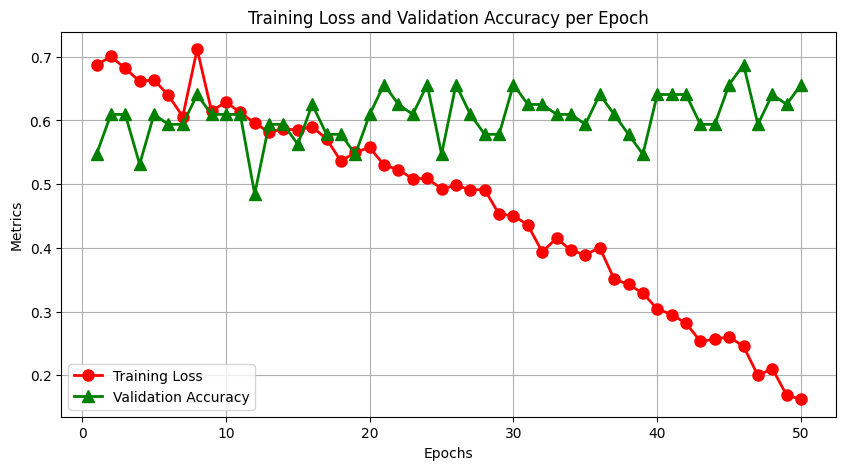

In [ ]:
import matplotlib.pyplot as plt

# Generate the 'epochs' list based on the actual number of epochs recorded in 'training_loss'
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(10, 5))  # Set the figure size

# Plot training loss
plt.plot(epochs, training_loss, 'r-o', label='Training Loss', linewidth=2, markersize=8)

# Ensure that 'validation_accuracy' has been recorded for the same number of epochs
if len(validation_accuracy) == len(training_loss):
    # Plot validation accuracy
    plt.plot(epochs, validation_accuracy, 'g-^', label='Validation Accuracy', linewidth=2, markersize=8)

# Adding titles and labels
plt.title('Training Loss and Validation Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.grid(True)

# Add a legend to specify which line is which
plt.legend()

# Show the plot
plt.show()


(3) Finetune the transformer model, and save the best model with the highest validation
accuracy.

In [ ]:
# Define the hyperparameters to test
n_heads_options = [8, 16]
learning_rates = [0.001, 0.01]
hidden_dims = [256, 512]
num_epochs_options = [10, 30]

# Placeholder for the best configuration
best_accuracy = 0
best_config = None

for nhead in n_heads_options:
    for lr in learning_rates:
        for d_model in hidden_dims:
            for num_epochs in num_epochs_options:
                print(f"Training with {nhead} heads, LR={lr}, Hidden Dim={d_model}, Epochs={num_epochs}")

                # Initialize model
                model = TransformerModel(num_tokens=10000, d_model=d_model, nhead=nhead, num_classes=2, num_layers=1)
                criterion = nn.CrossEntropyLoss()
                optimizer = optim.Adam(model.parameters(), lr=lr)

                # Train the model
                for epoch in range(num_epochs):
                    model.train()
                    for inputs, labels in train_loader:
                        src_mask = create_padding_mask(seq_length, batch_size, nhead)
                        outputs = model(inputs, src_mask)
                        loss = criterion(outputs, labels)

                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # Validate the model
                model.eval()
                total_accuracy = 0
                total_samples = 0
                with torch.no_grad():
                    for inputs, labels in validation_loader:
                        src_mask = create_padding_mask(seq_length, batch_size, nhead)
                        outputs = model(inputs, src_mask)
                        _, predicted = torch.max(outputs.data, 1)
                        total_samples += labels.size(0)
                        total_accuracy += (predicted == labels).sum().item()

                accuracy = total_accuracy / total_samples
                print(f"Validation Accuracy: {accuracy:.4f}")

                # Update best model
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_config = (nhead, lr, d_model, num_epochs)

# Output the best configuration
print(f"Best configuration: {best_config} with accuracy {best_accuracy:.4f}")


Training with 8 heads, LR=0.001, Hidden Dim=256, Epochs=10


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Validation Accuracy: 0.9271
Training with 8 heads, LR=0.001, Hidden Dim=256, Epochs=30
Validation Accuracy: 0.9167
Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=10
Validation Accuracy: 0.9062
Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=30
Validation Accuracy: 0.9010
Training with 8 heads, LR=0.01, Hidden Dim=256, Epochs=10
Validation Accuracy: 0.8958
Training with 8 heads, LR=0.01, Hidden Dim=256, Epochs=30
Validation Accuracy: 0.9062
Training with 8 heads, LR=0.01, Hidden Dim=512, Epochs=10


KeyboardInterrupt: 

First I ran a tuning session to coarse tune the hyperparameters: number of epochs (10 vs 30), number of attention heads (8 vs 16), learning rate (0.001 vs 0.01), and hidden dimensions (256 vs 512).  

Here are the results:

Training with 8 heads, LR=0.001, Hidden Dim=256, Epochs=10
Validation Accuracy: 0.8010

Training with 8 heads, LR=0.001, Hidden Dim=256, Epochs=30
Validation Accuracy: 0.7573

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=10
Validation Accuracy: 0.8031:

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=30
Validation Accuracy: 0.7719

Training with 8 heads, LR=0.01, Hidden Dim=256, Epochs=10
Validation Accuracy: 0.6188

Training with 8 heads, LR=0.01, Hidden Dim=256, Epochs=30
Validation Accuracy: 0.6490

Training with 8 heads, LR=0.01, Hidden Dim=512, Epochs=10
Validation Accuracy: 0.6031

Training with 8 heads, LR=0.01, Hidden Dim=512, Epochs=30
Validation Accuracy: 0.6188

Training with 16 heads, LR=0.001, Hidden Dim=256, Epochs=10
Validation Accuracy: 0.7896

Training with 16 heads, LR=0.001, Hidden Dim=256, Epochs=30
Validation Accuracy: 0.7708

Training with 16 heads, LR=0.001, Hidden Dim=512, Epochs=10
Validation Accuracy: 0.7896

Training with 16 heads, LR=0.001, Hidden Dim=512, Epochs=30
Validation Accuracy: 0.7760

Training with 16 heads, LR=0.01, Hidden Dim=256, Epochs=10
Validation Accuracy: 0.6198

Training with 16 heads, LR=0.01, Hidden Dim=256, Epochs=30
Validation Accuracy: 0.6573

Training with 16 heads, LR=0.01, Hidden Dim=512, Epochs=10
Validation Accuracy: 0.6073

Training with 16 heads, LR=0.01, Hidden Dim=512, Epochs=30
Validation Accuracy: 0.6406

Best configuration: (8, 0.001, 512, 10) with accuracy 0.8031

I found that the learning rate of 0.001 produced significantly better validation accuracy than did the rate of 0.01.  When the learning rate was 0.001, 30 epochs performed better than 10 epochs, although when the learning rate was 0.01, 10 epochs performed better, likely due to the fact that with such a high learning rate, 30 epochs overtrained the model.  Hidden dimension of 512 performance was quite comparable with that of 256.  There was also no clear winner between 16 attention heads or 8 heads.  This first round of hyper-parameter tuning reported that the optimal configuration was:

10 epochs (shorter), 8 heads, learning rate of 0.001 (lower), and 512 hidden dimensions (higher).  These configurations produced a validation accuracy of 80.31%. (992 samples total since the last incomplete batch was dropped)

I will continue tuning using the following configuration:

30 epochs, 8 attention heads, 0.001 learning rate, 512 hidden dimensions.

Now, let's try tuning parameters such as batch size, sequence length.

Next, I decided to try different values of batch size and sequence length.  I hypothesized that a shorter sequence might actually produce better accuracy since important words are likely written earlier in the sequence.  The results are as follows:

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=10, Batch Size=8, Sequence Length=8
Validation Accuracy: 0.6730

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=10, Batch Size=8, Sequence Length=16
Validation Accuracy: 0.6640

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=10, Batch Size=8, Sequence Length=32
Validation Accuracy: 0.6500

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=10, Batch Size=8, Sequence Length=64
Validation Accuracy: 0.6690

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=10, Batch Size=8, Sequence Length=128
Validation Accuracy: 0.6710

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=10, Batch Size=32, Sequence Length=8
Validation Accuracy: 0.7480

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=10, Batch Size=32, Sequence Length=16
Validation Accuracy: 0.7762

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=10, Batch Size=32, Sequence Length=32
Validation Accuracy: 0.8014

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=10, Batch Size=32, Sequence Length=64
Validation Accuracy: 0.8115

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=10, Batch Size=32, Sequence Length=128
Validation Accuracy: 0.8175

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=10, Batch Size=128, Sequence Length=8
Validation Accuracy: 0.7946

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=10, Batch Size=128, Sequence Length=16
Validation Accuracy: 0.8092

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=10, Batch Size=128, Sequence Length=32
Validation Accuracy: 0.8013

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=10, Batch Size=128, Sequence Length=64
Validation Accuracy: 0.8036

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=10, Batch Size=128, Sequence Length=128
Validation Accuracy: 0.7868

Best configuration: (8, 0.001, 512, 10, 32, 128) with accuracy 0.8175

Smaller batch size tended to perform worse than larger batch size, and longer sequence length actually tended to perform much better than a shorter sequence length, contrary to my hypothesis.  The optimal Configuration is now as follows:
Attention Heads:8
Learning Rate: 0.001
Hidden Dimensions: 512
Epochs: 10
Batch size: 32
Sequence Length: 128
Which produced a total validation accuracy of 81.75%

Lastly, I want to see if adding attention layers will improve or degrade the performance of the transformer model.  I will try 1, 2, 3, and 4 layers:

Note:  I noticed that I had made a mistake earlier in the code and was not actually changing the sequence length when I thought I was, so I have to tune that parameter again:

In [ ]:

# Define the hyperparameters to test
n_heads_options = [8]
learning_rates = [0.001]
hidden_dims = [512]
num_epochs_options = [7, 8, 9, 10]
batch_sizes = [32]
seq_lengths = [32]

# Placeholder for the best configuration
best_accuracy = 0
best_config = None

for nhead in n_heads_options:
    for lr in learning_rates:
        for d_model in hidden_dims:
            for num_epochs in num_epochs_options:
                for batch_size in batch_sizes:
                    for seq_length in seq_lengths:
                        print(f"Training with {nhead} heads, LR={lr}, Hidden Dim={d_model}, Epochs={num_epochs}, Batch Size={batch_size}, Sequence Length={seq_length}")

                        # Pad sequences to the current sequence length
                        max_length = seq_length
                        padded_train_filtered = pad_sequences(train_sequences_filtered, maxlen=max_length, padding='post', truncating='post')
                        padded_validation_filtered = pad_sequences(validation_sequences_filtered, maxlen=max_length, padding='post', truncating='post')

                        # Create the new tokenized DataFrames
                        tokenized_train_df_filtered = pd.DataFrame({'sentiment_score': train_data['sentiment_score'], 'tokenized_text': list(padded_train_filtered)})
                        tokenized_validation_df_filtered = pd.DataFrame({'sentiment_score': validation_data['sentiment_score'], 'tokenized_text': list(padded_validation_filtered)})

                        # Convert DataFrame columns to tensors more efficiently
                        train_labels = torch.tensor(tokenized_train_df_filtered['sentiment_score'].values)
                        train_inputs = torch.tensor(np.array(tokenized_train_df_filtered['tokenized_text'].tolist()))
                        train_dataset = TensorDataset(train_inputs, train_labels)
                        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

                        validation_labels = torch.tensor(tokenized_validation_df_filtered['sentiment_score'].values)
                        validation_inputs = torch.tensor(np.array(tokenized_validation_df_filtered['tokenized_text'].tolist()))
                        validation_dataset = TensorDataset(validation_inputs, validation_labels)
                        validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

                        # Initialize model
                        model = TransformerModel(num_tokens=10000, d_model=d_model, nhead=nhead, num_classes=2, num_layers=1)
                        criterion = nn.CrossEntropyLoss()
                        optimizer = optim.Adam(model.parameters(), lr=lr)

                        # Train the model
                        for epoch in range(num_epochs):
                            model.train()
                            for inputs, labels in train_loader:
                                src_mask = create_padding_mask(inputs.size(1), inputs.size(0), nhead)
                                outputs = model(inputs, src_mask)
                                loss = criterion(outputs, labels)

                                optimizer.zero_grad()
                                loss.backward()
                                optimizer.step()

                        # Validate the model
                        model.eval()
                        total_accuracy = 0
                        total_samples = 0
                        with torch.no_grad():
                            for inputs, labels in validation_loader:
                                src_mask = create_padding_mask(inputs.size(1), inputs.size(0), nhead)
                                outputs = model(inputs, src_mask)
                                _, predicted = torch.max(outputs.data, 1)
                                total_samples += labels.size(0)
                                total_accuracy += (predicted == labels).sum().item()

                        accuracy = total_accuracy / total_samples if total_samples != 0 else 0
                        print(f"Validation Accuracy: {accuracy:.4f}")

                        # Update best model
                        if accuracy > best_accuracy:
                            best_accuracy = accuracy
                            best_config = (nhead, lr, d_model, num_epochs, batch_size, seq_length)

# Output the best configuration
print(f"Best configuration: {best_config} with accuracy {best_accuracy:.4f}")


Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=7, Batch Size=32, Sequence Length=32
Validation Accuracy: 0.9062
Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=8, Batch Size=32, Sequence Length=32
Validation Accuracy: 0.9152
Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=9, Batch Size=32, Sequence Length=32
Validation Accuracy: 0.9062
Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=10, Batch Size=32, Sequence Length=32


KeyboardInterrupt: 

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=7, Batch Size=32, Sequence Length=8
Validation Accuracy: 0.6865

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=7, Batch Size=32, Sequence Length=16
Validation Accuracy: 0.7298

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=7, Batch Size=32, Sequence Length=32
Validation Accuracy: 0.7611

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=7, Batch Size=32, Sequence Length=64
Validation Accuracy: 0.8226

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=7, Batch Size=32, Sequence Length=96
Validation Accuracy: 0.7833

Training with 8 heads, LR=0.001, Hidden Dim=512, Epochs=7, Batch Size=32, Sequence Length=128
Validation Accuracy: 0.7752

The clear winner is a sequence length of 64 words/tokens with a validation accuracy of 82.26%.

Finally, we have the optimal hyperparameters:

n_heads = 8

learning_rate = 0.001

hidden_dim = 512

num_epochs = 7

batch_size = 32

seq_length = 64

num_layers = 1

Hopefully, we can get around 80% accuracy on the test set.


(e) Test Result Analysis
(1) Load the best model saved above and report the accuracy of the model on the test
dataset.

Train and save the optimal model:

In [ ]:
# optimal hyperparameters:
n_heads = 8
learning_rate = 0.001
hidden_dim = 512
num_epochs = 7
batch_size = 32
seq_length = 64
num_layers = 1


# Pad sequences to the same length
max_length = seq_length
padded_train_filtered = pad_sequences(train_sequences_filtered, maxlen=max_length, padding='post', truncating='post')
padded_validation_filtered = pad_sequences(validation_sequences_filtered, maxlen=max_length, padding='post', truncating='post')
padded_test_filtered = pad_sequences(test_sequences_filtered, maxlen=max_length, padding='post', truncating='post')

# Create the new tokenized DataFrames
tokenized_train_df_filtered = pd.DataFrame({'label': train_data['label'], 'tokenized_text': list(padded_train_filtered)})
tokenized_validation_df_filtered = pd.DataFrame({'label': validation_data['label'], 'tokenized_text': list(padded_validation_filtered)})
tokenized_test_df_filtered = pd.DataFrame({'label': test_data['label'], 'tokenized_text': list(padded_test_filtered)})

 # Convert DataFrame columns to tensors more efficiently
train_labels = torch.tensor(tokenized_train_df_filtered['label'].values)
train_inputs = torch.tensor(np.array(tokenized_train_df_filtered['tokenized_text'].tolist()))
train_dataset = TensorDataset(train_inputs, train_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

validation_labels = torch.tensor(tokenized_validation_df_filtered['label'].values)
validation_inputs = torch.tensor(np.array(tokenized_validation_df_filtered['tokenized_text'].tolist()))
validation_dataset = TensorDataset(validation_inputs, validation_labels)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
# Initialize model
model = TransformerModel(num_tokens=10000, d_model=hidden_dim, nhead=n_heads, num_classes=2, num_layers=num_layers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    model.train()
    total_loss = 0  # Initialize total loss for the epoch
    for inputs, labels in train_loader:
        src_mask = create_padding_mask(inputs.size(1), inputs.size(0), n_heads)
        outputs = model(inputs, src_mask)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()  # Accumulate the loss for the batch

    # Print the training loss for the epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {total_loss / len(train_loader)}")

# Save the model
torch.save(model.state_dict(), "transformer_model.pth")
print("Model saved successfully.")


Epoch 1/7, Training Loss: 2.0278162360191345
Epoch 2/7, Training Loss: 0.925600012143453
Epoch 3/7, Training Loss: 0.8801148335138956
Epoch 4/7, Training Loss: 0.7616366545359293
Epoch 5/7, Training Loss: 0.7288298805554708
Epoch 6/7, Training Loss: 0.6478529771169027
Epoch 7/7, Training Loss: 0.6674107710520426
Model saved successfully.


Now, use the saved model to make predictions on the test data:

In [ ]:
seq_length = 64
batch_size = 32

max_length = seq_length
padded_test_filtered = pad_sequences(test_sequences_filtered, maxlen=max_length, padding='post', truncating='post')
tokenized_test_df_filtered = pd.DataFrame({'label': test_data['label'], 'tokenized_text': list(padded_test_filtered)})

 #Load Test Data
# Convert DataFrame columns to tensors more efficiently
test_labels = torch.tensor(tokenized_test_df_filtered['label'].values)
test_inputs = torch.tensor(np.array(tokenized_test_df_filtered['tokenized_text'].tolist()))
test_dataset = TensorDataset(test_inputs, test_labels)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

 # Validate the model
model.load_state_dict(torch.load("transformer_model.pth"))
model.eval()

# Validate the model
total_accuracy = 0
total_samples = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        src_mask = create_padding_mask(inputs.size(1), inputs.size(0), n_heads)
        outputs = model(inputs, src_mask)
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        total_accuracy += (predicted == labels).sum().item()

accuracy = total_accuracy / total_samples
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.4173


Final Test Accuracy: 81.00%.  I think that's pretty good considering the subjective nature of the review content and ratings.

(2) What are the impacts of hyper-parameters, such as the hidden dimension and the
number of attention layers, on the Transformer?

From the experiment, I can conclude that these are likely the impacts of hyperparameters on the transformer:

Learning rate:  A high learning rate can help the model to learn optimal weights more quickly, but setting it too high can cause the model to miss the point entirely, leading to wildly high error rates and training loss.  The number of layers affects the learning rate:  more layers require a lower learning rate.  A learning rate that works well for a single-layer network is likely too high for a multi-layer transformer.  It is important to find a learning rate that is not too high or too low, and is also custom fit to the number of attention layers in the transformer.

Hidden dimension:  The hidden dimension really did not seem to affect the network all that much.  I tried 512 and 256 hidden dimensions and saw no significant difference.  Some more investigation into this parameter my be pertinent.

Number of attention layers:  The number of attention layers greatly affects the speed with which the transformer can be trained.  A transformer with more layers takes much longer to train than a transformer with fewer layers.  For this simple binary natural-language classifier, I think one layer was sufficient, but more layers might be necessary for more complex tasks such as generative natural language tasks.

Training Epochs:  It is important to find the proper number of epochs to train the transformer.  A single-layer network can be sufficiently trained in fewer than 10 epochs, and any more than that is wasted time, and can even degrade performance on unseen data.  A multi-layer network takes more epochs at a lower training rate to see peak accuracy.

Attention heads:  When comparing models with 8 vs 16 attention heads, I saw no significant difference between the performance of the two models, so I opted to keep the configuration of the 8 default heads, as recommended by the research paper in the link. There was no need to use more heads than necessary, as it would just slow down training performance.

Sequence Length:  While I originally hypothesized that the sequence length not need to be very long to accurately predict whether the review was positive or negative, it turned out that a sequence length of 64 words had the best performance  when compared to shorter sequences.  Although, needlessly long sequences of 96 or 128 words performed worse than 64 words.

Batch Size:  I originally thought that a smaller batch size would be better, as the gradient would be calculated more frequently, but it turns out that batching in batches of 32 samples is actually optimal.  I think this is a good balance between smoothness of gradient descent and updating frequently enough.

In [ ]:
import pandas as pd
import requests
from datetime import datetime, timedelta
import time

API_KEY = '14ee93fb9b974790a5d784ec5b8622ad'  # TwelveData API Key
endpoint = 'https://api.twelvedata.com/time_series'

# Load the dataset
news = pd.read_excel("pre_processed_news.xlsx")

# Add new columns for the required price information
news['open'] = None
news['five_minutes_prior_price'] = None
news['concurrent_price'] = None
news['close'] = None
news['low'] = None
news['high'] = None
news['sentiment_score'] = None

total_rows = len(news)

# Function to format the time remaining
def format_time(seconds):
    mins, secs = divmod(seconds, 60)
    hours, mins = divmod(mins, 60)
    return f"{int(hours):02d}:{int(mins):02d}:{int(secs):02d}"

start_time = time.time()

# Iterate over the DataFrame rows to make API requests
for index, row in news.iterrows():
    time.sleep(0.4)  # Add a small delay to avoid overwhelming the API
    print(f"Processing row {index + 1} of {total_rows}")
    symbol = row['tickers']
    timestamp = pd.Timestamp(row['date'])
    date = timestamp.date()

    # Uncomment the intraday fetching section if needed
    """
    # Five minutes prior to the original timestamp
    five_minutes_prior_timestamp_str = (timestamp - timedelta(minutes=5)).strftime('%Y-%m-%d %H:%M:%S')

    # Original timestamp formatted
    original_timestamp_str = timestamp.strftime('%Y-%m-%d %H:%M:%S')

    # Fetch the intraday prices for the five minutes prior and concurrent timestamps
    params_intraday = {
        'symbol': symbol,
        'interval': '1min',
        'apikey': API_KEY,
        'date': date,
        'outputsize': 61  # Assuming 5 minutes is sufficient to cover both timestamps
    }

    response_intraday = requests.get(endpoint, params=params_intraday)
    intraday_data = response_intraday.json()

    # Extracting intraday price information
    if 'values' in intraday_data:
        for entry in intraday_data['values']:
            entry_datetime_str = entry['datetime']
            if entry_datetime_str == original_timestamp_str:
                news.at[index, 'concurrent_price'] = entry['open']
            elif entry_datetime_str == five_minutes_prior_timestamp_str:
                news.at[index, 'five_minutes_prior_price'] = entry['open']
    """

    # Fetch the day's high, low, open, and close prices
    params_daily = {
        'symbol': symbol,
        'interval': '1day',
        'apikey': API_KEY,
        'date': date
    }
    response_daily = requests.get(endpoint, params=params_daily)
    daily_data = response_daily.json()

    # Update DataFrame with daily data
    if 'values' in daily_data and daily_data['values']:
        day_values = daily_data['values'][0]
        news.at[index, 'open'] = day_values['open']
        news.at[index, 'close'] = day_values['close']
        news.at[index, 'high'] = day_values['high']
        news.at[index, 'low'] = day_values['low']
        news.at[index, 'sentiment_score'] = 100 * round((float(day_values['close']) - float(day_values['open'])) / float(day_values['open']), 3)

    # Calculate progress
    elapsed_time = time.time() - start_time
    rows_processed = index + 1
    percent_complete = (rows_processed / total_rows) * 100
    time_per_row = elapsed_time / rows_processed
    time_remaining = time_per_row * (total_rows - rows_processed)

    print(f"Progress: {percent_complete:.2f}% complete. Estimated time remaining: {format_time(time_remaining)}")

# Save the updated DataFrame to a new Excel file
news.to_excel("updated_pre_processed_news.xlsx", index=False)
print("Data processing complete. Updated file saved as 'updated_pre_processed_news.xlsx'.")


Processing row 1 of 14507
Progress: 0.01% complete. Estimated time remaining: 02:39:46
Processing row 2 of 14507
Progress: 0.01% complete. Estimated time remaining: 03:27:30
Processing row 3 of 14507
Progress: 0.02% complete. Estimated time remaining: 03:08:28
Processing row 4 of 14507
Progress: 0.03% complete. Estimated time remaining: 03:28:19
Processing row 5 of 14507
Progress: 0.03% complete. Estimated time remaining: 03:37:42
Processing row 6 of 14507
Progress: 0.04% complete. Estimated time remaining: 03:26:35
Processing row 7 of 14507
Progress: 0.05% complete. Estimated time remaining: 03:18:44
Processing row 8 of 14507
Progress: 0.06% complete. Estimated time remaining: 03:12:27
Processing row 9 of 14507
Progress: 0.06% complete. Estimated time remaining: 03:07:29
Processing row 10 of 14507
Progress: 0.07% complete. Estimated time remaining: 03:03:42
Processing row 11 of 14507
Progress: 0.08% complete. Estimated time remaining: 03:00:48
Processing row 12 of 14507
Progress: 0.08

KeyboardInterrupt: 